## EE 461P: Data Science Principles  
### Assignment 1  
### Total points: 75
### Due: Tuesday, January 31, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Sidharth Babu, SNB2593
2. Laith Altarabishi, LA26744

# Question 1 (5 points)

Read [this](https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated) article that talks about the possibility of vaccines being uneffective in Israel since nearly 60% of severe COVID-19 hospitalization in Israel were vaccinated people. Use Simpson's Paradox to briefly explain if this claim holds true.


While it's true that nearly 60% of hospitilizations in Israel were vaccinated people, this observation is largely misleading due to the fact that there are a large number of confounding factors and dependent conditions that underly this data. Namely it doesn't address the fact the elderly(>50) are orders of magnitude more susceptible to having severe cases of COVID-19 than those who are younger(<50). This statisitic doesn't stratify the population of Israel by age, or look at the efficacy of the vaccine from a dataset where we consider the severe cases of the COVID-19 in a normalized count. 

In this article we see that both normalizing our severe cases, and stratifying our data by age we see significantly higher efficacy rates amongst both the elderly(85.2%) and the youth(91.8%) despite the fact that when we combine both groups together, we get significanly lower efficacy(67.5%). The reason for this is because the elderly were not only largely more vaccinated as a stratified age group(90.4% vs 73%) - but they were also more at risk of having a severe case of COVID in comparison to the youth. This creates a confounding situation that can effect the larger pool of data when we look at the population of Isreal as a whole, and gives us paradoxical results that may not characterize what's actually happening in our data. 

Thus, when clearly eliminating the confounding effect of age and looking at a stratified and normalized dataset, we see that the vaccine actually has a pretty high efficacy rate across all age groups and ranges - making a solid case for the vaccine actually being an effective countermeasure to COVID-19. 

# Question 2 (10 points)

100 students in the previous offering of this class were asked if they wanted to form their own groups for the course project or have the instructor randomize the groups. They reported their preferences by entering Yes or No in the survey. We use 0 to represent preferring their own groups and 1 to represent randomized groups. A random sample of 20 students yielded the following preferences:

$$1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1$$

These choices are assumed to arise by independent and identically distributed (i.i.d.) sampling from the following distribution and if the unknown parameter $q$ can be estimated, then we can provide more insights about the students' preference regrading the project groups.

$$
\begin{equation}
\nonumber P(x) = \left\{
\begin{array}{l l}
    q& \quad \text{for  } x=0\\
    1-q & \quad \text{for } x=1
\end{array} \right.
\end{equation}
$$

Based on the definitions given above, identify the likelihood function and derive the **maximum likelihood estimator** of $q$. Using the given sample, find a maximum likelihood estimate of $q$ as well.

# Answer 2

L(θ) = ∏ f(xi|θ) = ∏ q^1-xi * (1-q)^xi 
we can then find the log likelihood to get the same MLE.
l(θ) = sum(1-xi) * logq + sum(xi) * log(1-q)
taking the derivative of the above and setting to 0 we find that the MLE of q is
(n - sum(xi)/q  -  sum(xi)/(1-q) = 0

which using the sample data above gets us a result of 7/20 for q.

# Question 3 (5+5 points)

a) Briefly explain what you understand by an estimator of a numeric quantity being unbiased? Show that the MLE for the variance of a Gaussian is biased.

b) Suppose the mean of the Gaussian distribution, $\mu$. So given a data set assumed to be obtained by sampling i.i.d from this Gaussian, your job is to obtain the MLE for the unknown variance. Derive the equation for this estimate and show that it is unbiased.

a) An estimator of a numeric quanitiy being unbiased means that if we are given a sufficient amount of samples for a subset of data, we are able to give an accurate estimation of the numeric quantitiy with respect to the total population of the underlying data.

The MLE for the variance of a Gaussian is biased because it depends on the MLE for its mean, which is problematic because our variance follows the sample mean and tends to be less than the true mean. <- this is what he said in class lol do we need a proof?

b) 

# Answer 3


# Question 4 (5+5 points)

a) What is multicollinearity in the context of linear regression and why is it problematic?

b) How do you diagnose and fix multicollinearity?


a) Multicollinearity refers to the situation where two or more independent variables that contribute to our linear regression model are correlated with one another - meaning that we can effectively predict one independent variable as a function of other independent variables. This is problematic as this will create instability in our model since we know that in our linear equations for regression, we try to compute beta values that represent the isolated rate of change in our dependent variable with respect to each independent variable - fixing everything else. However, if our independent variables are correlated with one another - this creates complications since our model won't be able to accurately estimate what beta values accurately map our independent variables to our dependent variable since we won't be able to isolate each independent variable without possibly effecting other variables in a significant way.

b) We could diagnose multicollinearity by computing the correlation matrix between all of our independent variables, and evaluating which variables have the most correlation and whether or not the correlation value is too high. We could also evaluate the standard error of our data, and see if the error is very high with some of the independent variables. To fix this problem, there a few solutions that we could explore. We could use PCA to reduce the dimensionality of our data, or remove variables that are highly correlated with one another from the dataset. 

# Question 5 : Regression (40 points)


### 5.1 Generate Data (5 points)
Generate a synthetic regression dataset using make_regression from [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) with the following characteristics :
n_samples = 20000, n_features = 20, n_informative = 15, n_targets = 1, coef = True and random_state = 42, bias = True, noise = 0.1.

**Reading Assignment** : Read about how this data is generated and the affect of the above mentioned parameters on the data. 

In [1]:
from sklearn.datasets import make_regression

data, labels, coef = make_regression(n_samples=20000, n_features=20,n_informative = 15, n_targets = 1, coef = True, random_state = 42, bias = True, noise = 0.1)

### 5.2 Perform Regression (10 points)
a) Divide the above obtained data into a train/test split by using 20% of the data for testing. Then train a linear regression model using Ordinary Least Squares method from [sklearn](https://scikit-learn.org/stable/modules/linear_model.html). 

b) Evaluate the trained model using Mean Squared Error on both train and test datasets and report the performance. 

c) Also, print the coefficients and bias obtained after the fit and compare them with the coefficients and bias that were used for generating the data in 5.1. 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split data into 20% split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2, random_state=42)
# train OLS model on training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# evaluate performances on training and test set of model
from sklearn.metrics import mean_squared_error
mse = []

# MSE on training data
train_preds = model.predict(x_train)
mse.append(mean_squared_error(y_train, train_preds))

# MSE on testing data
test_preds = model.predict(x_test)
mse.append(mean_squared_error(y_test, test_preds))

print(f"MSE on Training Set: {mse[0]} \nMSE on Testing Set: {mse[1]}")

MSE on Training Set: 0.009974584995040442 
MSE on Testing Set: 0.010471400998120259


In [29]:
#compare coeffs between fitted model and generated dataset
for x, y in zip(model.coef_, coef):
    print(f"Model coef: {x} Dataset coef: {y}")
bias1, bias2 = model.intercept_, 1 # note that we only define bias in dataset as True
print(f"Model bias: {bias1} Dataset bias: {bias2}")

Model coef: 49.75681025613976 Dataset coef: 49.75788257941096
Model coef: 90.83496080443435 Dataset coef: 90.83665798480541
Model coef: 25.028837978239192 Dataset coef: 25.028419436070127
Model coef: -5.340981157886393e-05 Dataset coef: 0.0
Model coef: 4.603684873378317 Dataset coef: 4.60361603267746
Model coef: 30.854879296962636 Dataset coef: 30.853507037368356
Model coef: 0.0009585740939197507 Dataset coef: 0.0
Model coef: 93.84745887336383 Dataset coef: 93.8463549949489
Model coef: 56.30270537919605 Dataset coef: 56.302417471393085
Model coef: 65.63068443553912 Dataset coef: 65.6311586956528
Model coef: 17.004979444956213 Dataset coef: 17.00530636040365
Model coef: 0.0013727246315307085 Dataset coef: 0.0
Model coef: 31.35989259748749 Dataset coef: 31.359600566828817
Model coef: 0.0007870774001865755 Dataset coef: 0.0
Model coef: 60.76466431057311 Dataset coef: 60.76515030383425
Model coef: 54.96354508677353 Dataset coef: 54.962444325272465
Model coef: 28.809792956022193 Dataset coe

### 5.3 Residuals (5 points)
a) Compute the residuals (difference between predicted and original values)  of the trained model on the test data. Compute and show the mean and variance of the residuals. 

b) Scatter plot the residuals along with true predictions and observe how are the residuals distributed.

(BONUS) How do the above observations relate to one of the asumptions behind the MLR model? (5 points)

In [9]:
import numpy as np

# compute mean and variance of residuals
residuals = test_preds - y_test
mu, var = np.mean(residuals), np.var(residuals)
print(f"Mean: {mu} \nVariance: {var}")

Mean: 0.0015220159112302309 
Variance: 0.01046908446568622


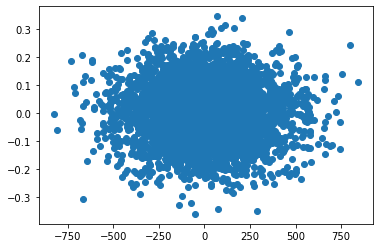

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, residuals)
plt.xlabel = "Target Values"
plt.ylabel = "Residuals"
plt.show()

BONUS: We know our residuals should have a variance that reflects the distribution of a Gaussian - and from our plot above we can see that the majority of our data is concentrated around 0.2 to -0.2 residual mark as well as there being significantly fewer points beyond that(on the tail-end of the distribution). This seems to satisfy our assumption that our MLR model's error term (residuals) are normally distributed.

### 5.4 Lasso and Ridge Regression (10 points)

a) Run Lasso and Ridge regression on the data generated in 5.1 by varying the parameter alpha from 10^-3 to 10^3. For each value of the alpha, store the train error (MSE), test error (MSE), and norm of the coefficient vector using [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

b) Plot the train error, test error and the norm of the coefficient vector with increasing alpha and note what you observe. Use one plot for train error and test error and another for the norm.


In [44]:
from sklearn.linear_model import Lasso, Ridge

# generate set of alpha values
alphas = np.linspace(10**-3, 10**3, 1000)

train_MSE = []
test_MSE = []
lasso_norms = []
ridge_norms = []

for a in alphas:
    model_lasso = Lasso(alpha=a)
    model_ridge = Ridge(alpha=a)

    #fit models and compute MSE from predictions
    model_lasso.fit(x_train, y_train)
    model_ridge.fit(x_train, y_train)

    #get norm of coef vector
    lasso_norms.append(np.linalg.norm(model_lasso.coef_))
    ridge_norms.append(np.linalg.norm(model_ridge.coef_))

    # get training MSE first
    lasso_preds = model_lasso.predict(x_train)
    ridge_preds = model_ridge.predict(x_train)

    train_lasso_mse = mean_squared_error(y_train, lasso_preds)
    train_ridge_mse = mean_squared_error(y_train, ridge_preds)

    # get test MSE
    lasso_preds = model_lasso.predict(x_test)
    ridge_preds = model_ridge.predict(x_test)

    test_lasso_mse = mean_squared_error(y_test, lasso_preds)
    test_ridge_mse = mean_squared_error(y_test, ridge_preds)

    #return MSEs
    train_MSE.append([train_lasso_mse, train_ridge_mse])
    test_MSE.append([test_lasso_mse, test_ridge_mse])

In [45]:
# put in np array format for convience
train_MSE = np.array(train_MSE)
test_MSE = np.array(test_MSE)

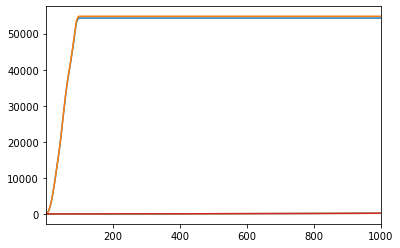

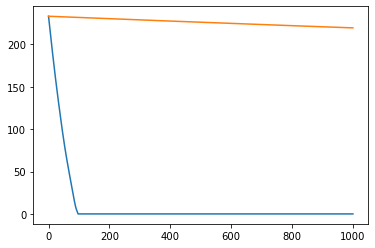

In [46]:
# plot both training and testing MSE for lasso and ridge
plt.xlim(min(alphas), max(alphas))
# 0th index of train_MSE is lasso and 1st is ridge
plt.plot(alphas, np.array([train_MSE[:,0], test_MSE[:,0], train_MSE[:,1], test_MSE[:,1]]).T)
plt.xlabel = "Alphas"
plt.ylabel = "Losses"
plt.title = "Lasso and Ridge Train/Test Loss"
plt.show()
plt.figure()

# plot norms
plt.plot(alphas, np.array([lasso_norms, ridge_norms]).T)
plt.xlabel = "Alphas"
plt.ylabel = "Norms"
plt.title = "Lasso and Ridge Norms"
plt.show()

When looking at our train/test MSE plot - we notice how quickly our lasso losses spike in value as our alphas value increases. We also see a spike in loss for our ridge losses, but it's noticeably less. This is likely due to the fact that the lasso model is a weaker regularizer of our data than the ridge model.

In contrast, we notice that our norm is decreasing for both of our models - with our norm decreasing significantly faster with our lasso model.

### 5.5 Real-world Regression Problem (10 points)

The dataset in the file ecommerce_dataset.csv is for an ecommerce business trying to predict the annual amount spent by each customer. Use Lasso and Ridge regression on the set of independent variables {Average Session Length, Time on App, Time on Website, Length of Membership}  to predict the dependent variable **Yearly Amount Spent**. Vary the value of alpha in the range 10^-6 to 10^5 and do 5-fold cross-validation using sklearn's KFold to find the value of alpha that gives best performance as measured using MSE.

In [47]:
import pandas as pd

#read csv
df = pd.read_csv("ecommerce_dataset.csv")
df.head()

,Email,Address,Avatar,Average Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [50]:
cats = ["Average Session Length", "Time on App", "Time on Website", "Length of Membership"]

# create segregated datasets 
X, y = df[cats], df["Yearly Amount Spent"]

In [63]:
from sklearn.model_selection import KFold

# generate set of alpha values
alphas = np.arange(10**-6, 10**5, 10)
test_MSE = []

# define 5 fold cross val model
fold = KFold(5)
avg_loss = []

# for convienence 
X = np.array(X)
y = np.array(y)

for a in alphas:
    model_lasso = Lasso(alpha=a)
    model_ridge = Ridge(alpha=a)
    ridge_losses = [] # collect losses and compute avg for all splits and compare 
    lasso_losses = []

    for train_index, test_index in fold.split(X):
        #fit models and compute MSE from predictions
        model_lasso.fit(X[train_index], y[train_index])
        model_ridge.fit(X[train_index], y[train_index])

        # get test MSE
        lasso_preds = model_lasso.predict(X[test_index])
        ridge_preds = model_ridge.predict(X[test_index])

        test_lasso_mse = mean_squared_error(y[test_index], lasso_preds)
        test_ridge_mse = mean_squared_error(y[test_index], ridge_preds)

        #accumulate all losses
        ridge_losses.append(test_ridge_mse)
        lasso_losses.append(test_lasso_mse)

    # compute avg of all splits for each alpha value
    ridge_avg = sum(ridge_losses)/len(ridge_losses)
    lasso_avg = sum(lasso_losses)/len(lasso_losses)
    avg_loss.append([lasso_avg, ridge_avg]) 

In [64]:
avg_loss = np.array(avg_loss)
avg_loss.shape

(10000, 2)

In [65]:
for i in range(len(alphas)):
    print(f"Alpha: {alphas[i]} Lasso MSE: {avg_loss[i][0]} Ridge MSE: {avg_loss[i][1]}")

Alpha: 1e-06 Lasso MSE: 100.45751849795118 Ridge MSE: 100.4575178297172
Alpha: 10.000001 Lasso MSE: 400.6630095448963 Ridge MSE: 103.92217944391084
Alpha: 20.000001 Lasso MSE: 1302.6687701692676 Ridge MSE: 113.80994594966475
Alpha: 30.000001 Lasso MSE: 2558.7113484080455 Ridge MSE: 129.23902018284065
Alpha: 40.000001 Lasso MSE: 3789.020848892125 Ridge MSE: 149.44532309682168
Alpha: 50.000001 Lasso MSE: 4719.478323778244 Ridge MSE: 173.76540124837402
Alpha: 60.000001 Lasso MSE: 5835.318354343569 Ridge MSE: 201.62207180097988
Alpha: 70.000001 Lasso MSE: 6311.915544035362 Ridge MSE: 232.51232320559194
Alpha: 80.000001 Lasso MSE: 6311.915544035362 Ridge MSE: 265.9970822346796
Alpha: 90.000001 Lasso MSE: 6311.915544035362 Ridge MSE: 301.69253133369006
Alpha: 100.000001 Lasso MSE: 6311.915544035362 Ridge MSE: 339.26271860920235
Alpha: 110.000001 Lasso MSE: 6311.915544035362 Ridge MSE: 378.4132494654094
Alpha: 120.000001 Lasso MSE: 6311.915544035362 Ridge MSE: 418.8858864354228
Alpha: 130.000

From our data above, 1e-06 is our best alpha value for minimizing MSE loss.